**Medical Insurance Cost Prediction**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Data Load
df = pd.read_csv('/content/Insurance_Data.csv')

**1.	Data Understanding & Preprocessing**

In [ ]:
# Display initial data info
print("Initial Data Overview:")
print(df.head())

Initial Data Overview:
   Unnamed: 0  age     sex    bmi  children smoker     region      charges
0         594   41    male  40.26         0     no  southeast   5709.16440
1         306   28  female  27.50         2     no  southwest  20177.67113
2          54   40  female  28.69         3     no  northwest   8059.67910
3         493   61    male  43.40         0     no  southwest  12574.04900
4         403   49    male  32.30         3     no  northwest  10269.46000


In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100335 entries, 0 to 100334
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100335 non-null  int64  
 1   age         100335 non-null  int64  
 2   sex         100335 non-null  object 
 3   bmi         100335 non-null  float64
 4   children    100335 non-null  int64  
 5   smoker      100335 non-null  object 
 6   region      100335 non-null  object 
 7   charges     100335 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ MB


In [ ]:
df.shape

(100335, 8)

In [ ]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,100335.000000,100335.000000,100335.000000,100335.000000,100335.000000
mean,666.873504,39.308576,30.664623,1.094503,13300.844873
std,386.752495,14.030997,6.085236,1.204944,12104.365984
min,0.000000,18.000000,15.911164,0.000000,1121.824004
25%,332.000000,27.000000,26.262681,0.000000,4753.665682
50%,664.000000,39.000000,30.416948,1.000000,9391.380733
75%,1002.000000,51.000000,34.721905,2.000000,16657.757928
max,1337.000000,64.000000,53.174286,5.000000,63770.476644


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
#removing unnecessary columns
df_n=df.drop(columns=['Unnamed: 0'])

In [ ]:
df_n.shape

(100335, 7)

In [ ]:
df_n.head()

,age,sex,bmi,children,smoker,region,charges
0,41,male,40.26,0,no,southeast,5709.16440
1,28,female,27.50,2,no,southwest,20177.67113
2,40,female,28.69,3,no,northwest,8059.67910
3,61,male,43.40,0,no,southwest,12574.04900
4,49,male,32.30,3,no,northwest,10269.46000


In [ ]:
df_n.describe()

,age,bmi,children,charges
count,100335.000000,100335.000000,100335.000000,100335.000000
mean,39.308576,30.664623,1.094503,13300.844873
std,14.030997,6.085236,1.204944,12104.365984
min,18.000000,15.911164,0.000000,1121.824004
25%,27.000000,26.262681,0.000000,4753.665682
50%,39.000000,30.416948,1.000000,9391.380733
75%,51.000000,34.721905,2.000000,16657.757928
max,64.000000,53.174286,5.000000,63770.476644


In [ ]:
df_n.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
print("\nMissing values :")
print(df.isnull().sum())


Missing values :
Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [ ]:
print("Duplicates")
df.duplicated().sum()

Duplicates


np.int64(0)

In [ ]:
df['charges'].unique()

array([ 5709.1644    , 20177.67113   ,  8059.6791    , ...,
        3393.39398226,  7418.49597992,  5438.71433425])

In [ ]:
df['charges'].value_counts()

,count
charges,
1639.563100,2
48675.503722,1
13725.441822,1
8232.663662,1
5979.681777,1
...,...
1727.781377,1
23401.323273,1
1121.839081,1


In [ ]:
# defining features
num_feats = ['age', 'bmi', 'children']
cat_feats = ['sex', 'smoker', 'region']
target_var = 'charges'


In [ ]:
#viewing and handling outlier

In [ ]:
print("\n--- Outlier Counts (before removal) ---")
df_no_outliers = df_n.copy()

for col in num_feats + [target_var]:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers detected.")


--- Outlier Counts (before removal) ---
Column 'age': 0 outliers detected.
Column 'bmi': 643 outliers detected.
Column 'children': 0 outliers detected.
Column 'charges': 10453 outliers detected.


In [ ]:

initial_rows = df_no_outliers.shape[0]
print(f"\nInitial number of rows: {initial_rows}")


Initial number of rows: 100335


In [ ]:

for col in num_feats :
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

df_n = df_no_outliers.copy()

rows_after_removal = df_n.shape[0]
print(f"Number of rows after outlier removal: {rows_after_removal}")
print(f"Total rows removed: {initial_rows - rows_after_removal}")
print("Outliers removed from numerical features and target variable.")

Number of rows after outlier removal: 99692
Total rows removed: 643
Outliers removed from numerical features and target variable.


In [ ]:
print("\n--- Outlier Counts (after removal) ---")
df_no_outliers = df_n.copy()

for col in num_feats:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers detected.")


--- Outlier Counts (after removal) ---
Column 'age': 0 outliers detected.
Column 'bmi': 39 outliers detected.
Column 'children': 0 outliers detected.


In [ ]:
df_n['smoker_binary'] = df_n['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df_n['age_smoker_interaction'] = df_n['age'] * df_n['smoker_binary']
df_n['bmi_smoker_interaction'] = df_n['bmi'] * df_n['smoker_binary']
df_n.drop(columns=['smoker_binary'], inplace=True)

In [ ]:
df_n.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64
age_smoker_interaction,int64
bmi_smoker_interaction,float64


In [ ]:
df_n.head()

,age,sex,bmi,children,smoker,region,charges,age_smoker_interaction,bmi_smoker_interaction
0,41,male,40.26,0,no,southeast,5709.16440,0,0.0
1,28,female,27.50,2,no,southwest,20177.67113,0,0.0
2,40,female,28.69,3,no,northwest,8059.67910,0,0.0
3,61,male,43.40,0,no,southwest,12574.04900,0,0.0
4,49,male,32.30,3,no,northwest,10269.46000,0,0.0


In [ ]:
num_feats.extend(['age_smoker_interaction', 'bmi_smoker_interaction'])


In [ ]:
print(f"\nUpdated Numerical Features: {num_feats}")
print("\nDataFrame head after Feature Engineering:")
print(df_n.head())


Updated Numerical Features: ['age', 'bmi', 'children', 'age_smoker_interaction', 'bmi_smoker_interaction']

DataFrame head after Feature Engineering:
   age     sex    bmi  children smoker     region      charges  \
0   41    male  40.26         0     no  southeast   5709.16440   
1   28  female  27.50         2     no  southwest  20177.67113   
2   40  female  28.69         3     no  northwest   8059.67910   
3   61    male  43.40         0     no  southwest  12574.04900   
4   49    male  32.30         3     no  northwest  10269.46000   

   age_smoker_interaction  bmi_smoker_interaction  
0                       0                     0.0  
1                       0                     0.0  
2                       0                     0.0  
3                       0                     0.0  
4                       0                     0.0  


In [ ]:
#One hot encoding

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
cat_encoded = ohe.fit_transform(df_n[cat_feats])
cat_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_feats), index=df_n.index)

In [ ]:
cat_df.shape

(99692, 5)

In [ ]:
cat_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0


In [ ]:
cat_df.dtypes

,0
sex_male,float64
smoker_yes,float64
region_northwest,float64
region_southeast,float64
region_southwest,float64


In [ ]:

df_n = pd.concat([df_n, cat_df], axis=1)

# Drop the original categorical columns now that one-hot encoding is done
df_n.drop(columns=cat_feats, inplace=True)

In [ ]:
df_n.shape

(99692, 11)

In [ ]:
df_n.head()

,age,bmi,children,charges,age_smoker_interaction,bmi_smoker_interaction,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,41,40.26,0,5709.16440,0,0.0,1.0,0.0,0.0,1.0,0.0
1,28,27.50,2,20177.67113,0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,28.69,3,8059.67910,0,0.0,0.0,0.0,1.0,0.0,0.0
3,61,43.40,0,12574.04900,0,0.0,1.0,0.0,0.0,0.0,1.0
4,49,32.30,3,10269.46000,0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_n.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
age_smoker_interaction,int64
bmi_smoker_interaction,float64
sex_male,float64
smoker_yes,float64
region_northwest,float64
region_southeast,float64


In [ ]:
#Scaling-MinMax scaler

In [ ]:
scaler = MinMaxScaler()
df_n[num_feats] = scaler.fit_transform(df_n[num_feats])

In [ ]:
df_n.shape

(99692, 11)

In [ ]:
df_n.head()

,age,bmi,children,charges,age_smoker_interaction,bmi_smoker_interaction,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.500000,0.773007,0.0,5709.16440,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.217391,0.367913,0.4,20177.67113,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.478261,0.405692,0.6,8059.67910,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.934783,0.872694,0.0,12574.04900,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.673913,0.520300,0.6,10269.46000,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**2.	Exploratory Data Analysis (EDA)**

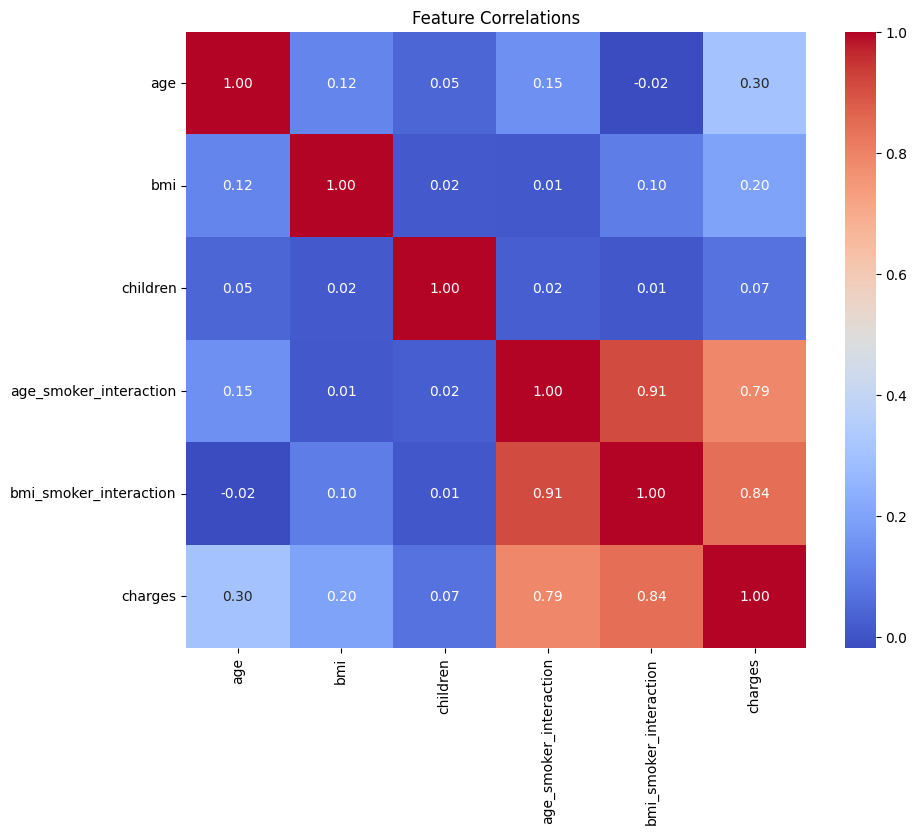

In [ ]:
# A heatmap to visualize the correlation matrix between numerical features and insurance charges.
plt.figure(figsize=(10, 8))
sns.heatmap(df_n[num_feats + [target_var]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()

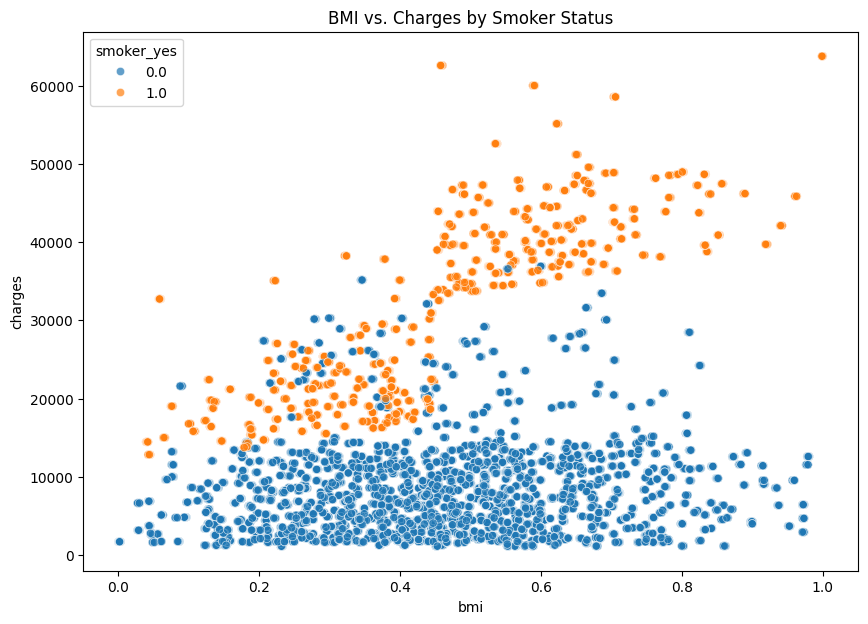

In [ ]:
# A scatter plot to analyze the relationship between BMI and insurance charges,
# with points colored by smoking status to highlight its influence.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='bmi', y='charges', hue='smoker_yes', data=df_n, alpha=0.7)
plt.title('BMI vs. Charges by Smoker Status')
plt.show()

#1.0=smoker_yes is true

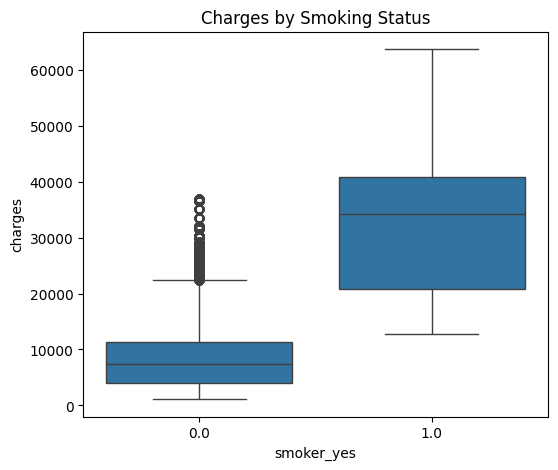

In [ ]:
# A box plot to show the distribution of insurance costs based on smoking status,
# revealing how significantly smoking impacts charges.
plt.figure(figsize=(6, 5))
sns.boxplot(x='smoker_yes', y='charges', data=df_n)
plt.title('Charges by Smoking Status')
plt.show()

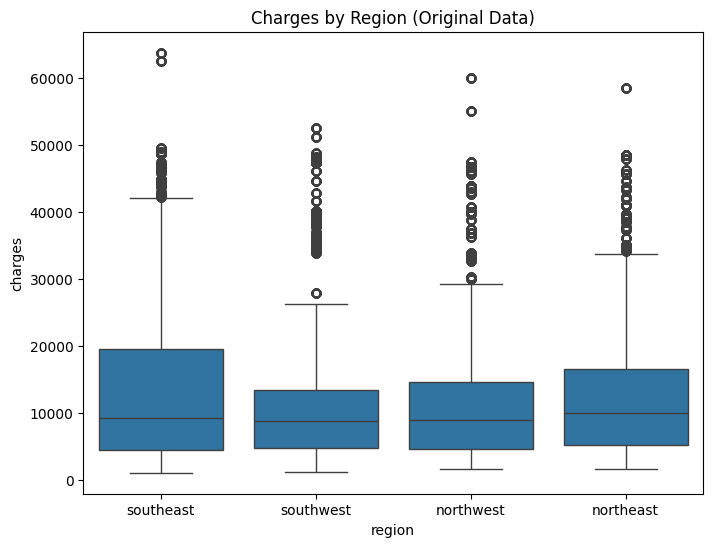

In [ ]:
# A box plot to examine how insurance costs vary across different residential regions,
# illustrating regional pricing differences.
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region (Original Data)')
plt.show()


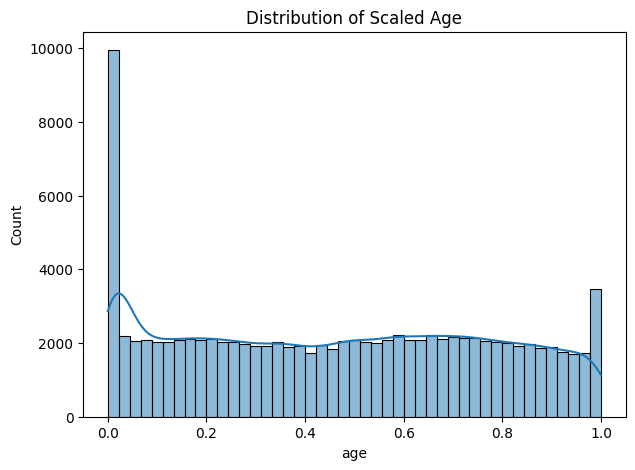

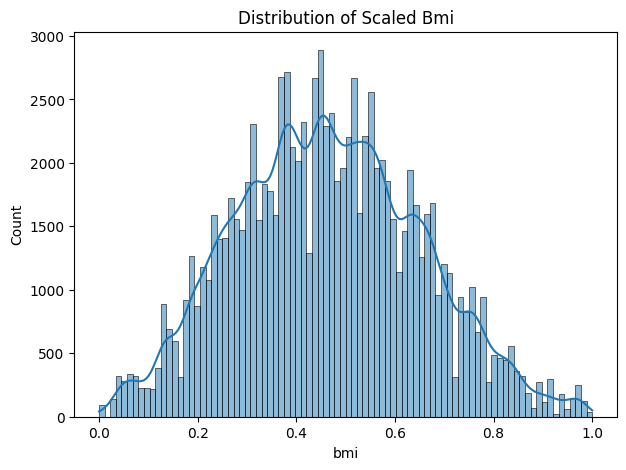

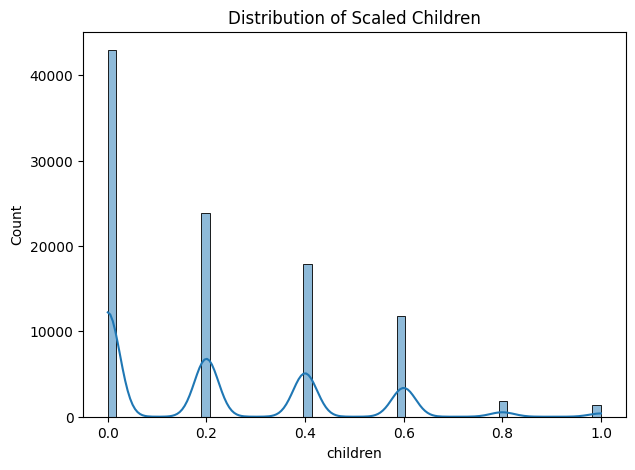

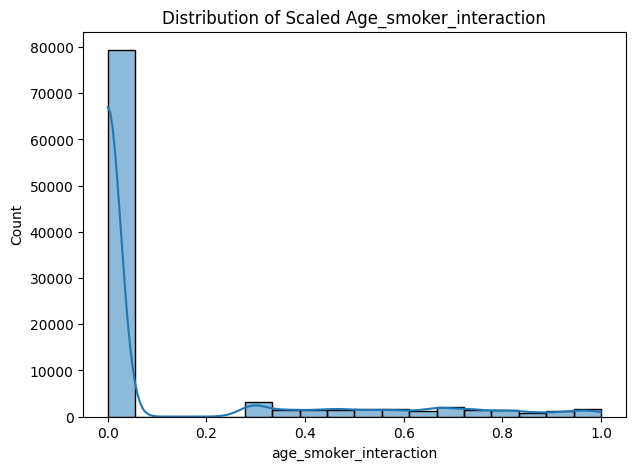

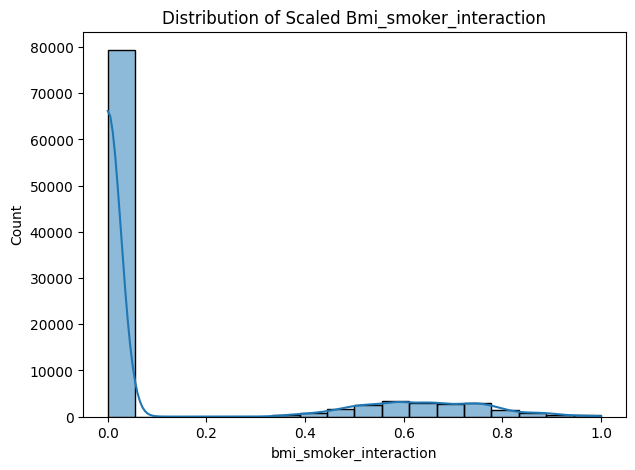

In [ ]:
# Plot distributions of numerical features.
for col in num_feats:
    plt.figure(figsize=(7, 5))
    sns.histplot(df_n[col], kde=True)
    plt.title(f'Distribution of Scaled {col.capitalize()}')
    plt.show()

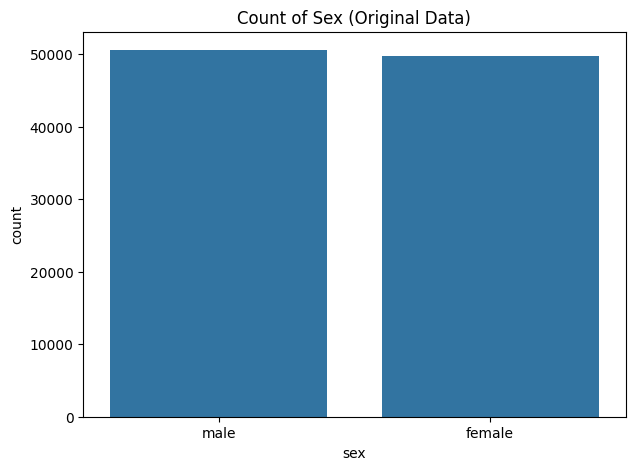

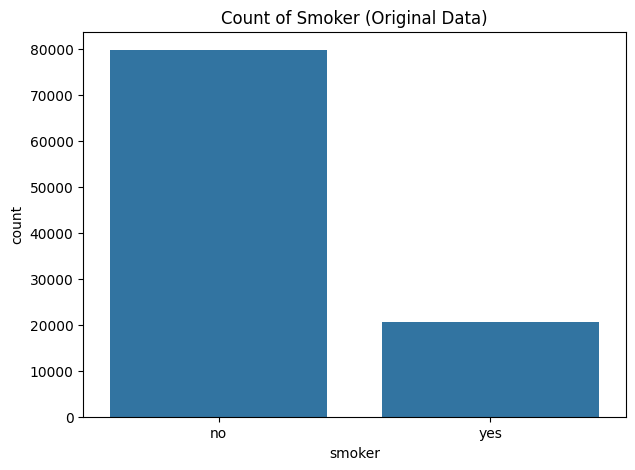

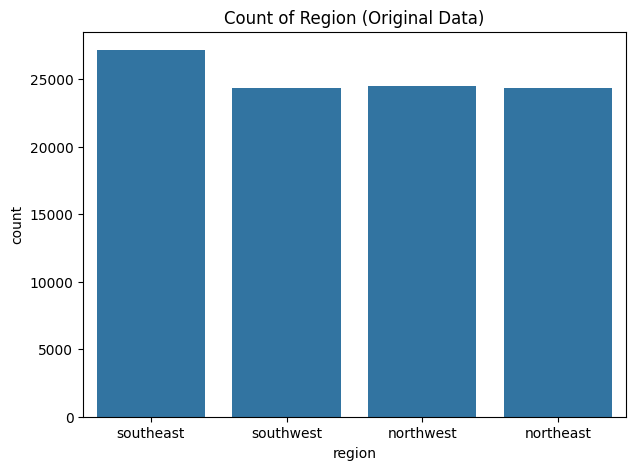

In [ ]:
# Plot distributions of categorical features.
for col in cat_feats:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col.capitalize()} (Original Data)')
    plt.show()

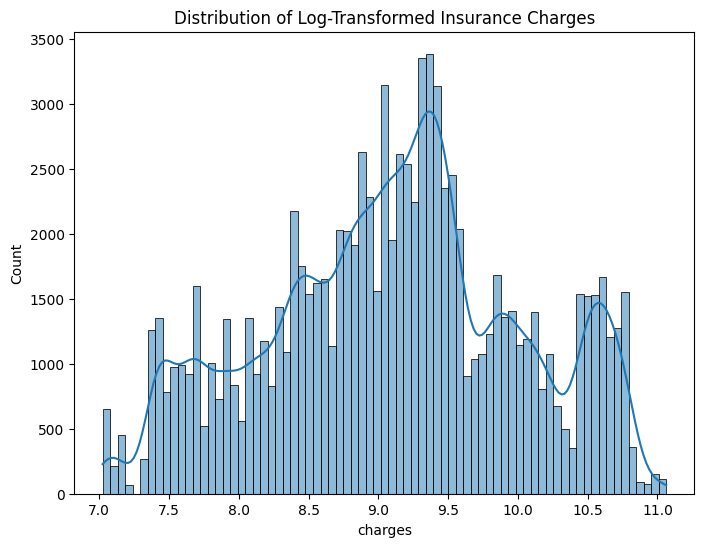

In [ ]:
#Plot the distribution of the target variable (charges).
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(df_n[target_var]), kde=True)
plt.title('Distribution of Log-Transformed Insurance Charges')
plt.show()

**3.	Building the Model**

In [ ]:
#features
X_data = df_n.drop(columns=[target_var])
y_data = np.log1p(df_n[target_var])

In [ ]:
X_data.shape

(99692, 10)

In [ ]:
y_data.shape

(99692,)

In [ ]:
scaler_y = MinMaxScaler()
y_data_scaled = scaler_y.fit_transform(y_data.values.reshape(-1, 1))
y_data_scaled = y_data_scaled.flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_scaled, test_size=0.2, random_state=42)


In [ ]:
X_train.shape


(79753, 10)

In [ ]:
X_test.shape


(19939, 10)

In [ ]:
y_train.shape


(79753,)

In [ ]:
y_test.shape

(19939,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

In [ ]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,569 (678.00 KB)

 Trainable params: 171,777 (671.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
history = ann_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/200
1990/1994 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6012 - mae: 0.5449
Epoch 1: val_loss improved from inf to 0.00842, saving model to model.keras
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.6003 - mae: 0.5444 - val_loss: 0.0084 - val_mae: 0.0543
Epoch 2/200
1987/1994 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mae: 0.1046
Epoch 2: val_loss improved from 0.00842 to 0.00834, saving model to model.keras
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0201 - mae: 0.1045 - val_loss: 0.0083 - val_mae: 0.0535
Epoch 3/200
1990/1994 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mae: 0.0777
Epoch 3: val_loss improved from 0.00834 to 0.00764, saving model to model.keras
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - loss: 0.0127 - mae: 0.0777 - val_loss: 0.0076 - val_mae: 0.0479
Epoch 4/200
1988/1994 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mae: 0.0727
Epoch 4: val_loss did not improve from 0.00764
1994/1994 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - los

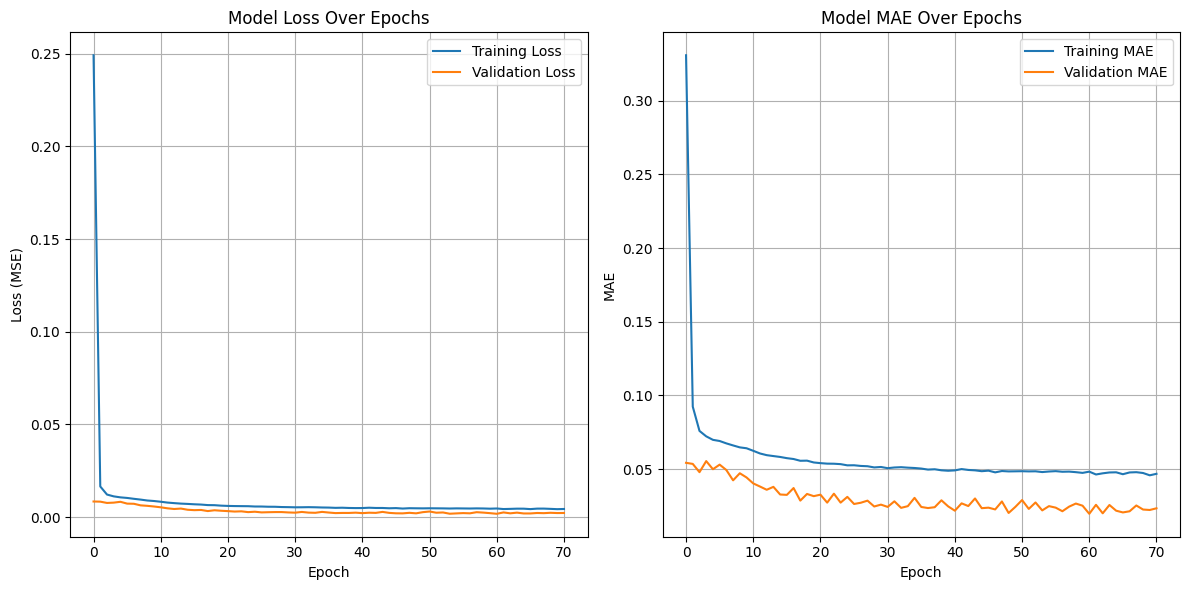

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**4.	Model Evaluation & Optimization**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print("\n--- Model Evaluation (on Scaled Data) ---")
test_loss_scaled, test_mae_scaled = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE) on Scaled Data: {test_loss_scaled:.4f}")
print(f"Test MAE on Scaled Data: {test_mae_scaled:.4f}")




--- Model Evaluation (on Scaled Data) ---
Test Loss (MSE) on Scaled Data: 0.0019
Test MAE on Scaled Data: 0.0200


In [ ]:
y_pred_scaled = ann_model.predict(X_test)

print(f"R-squared (R2) Score: {r2_score(y_test, y_pred_scaled):.4f}")



624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
R-squared (R2) Score: 0.9628


In [ ]:
y_pred_original_transformed_scale = scaler_y.inverse_transform(y_pred_scaled)
y_test_original_transformed_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_train_original_transformed_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [ ]:


y_pred_original = np.expm1(y_pred_original_transformed_scale)
y_test_original = np.expm1(y_test_original_transformed_scale)
y_train_original = np.expm1(y_test_original_transformed_scale)

In [ ]:
print("\n--- Model Evaluation (on Original Dollar Scale) ---")

mae_original = mean_absolute_error(y_test_original, y_pred_original)
print(f"Mean Absolute Error (MAE): ${mae_original:.2f}")




--- Model Evaluation (on Original Dollar Scale) ---
Mean Absolute Error (MAE): $1256.77


In [ ]:
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (MSE): ${mse_original:.2f}")



Mean Squared Error (MSE): $12762839.98


In [ ]:
rmse_original = np.sqrt(mse_original)
print(f"Root Mean Squared Error (RMSE): ${rmse_original:.2f}")



Root Mean Squared Error (RMSE): $3572.51


In [ ]:
r2 = r2_score(y_test_original, y_pred_original)
print(f"R-squared (R2) Score: {r2:.4f}")

#testing accuracy

R-squared (R2) Score: 0.9134


In [ ]:
r2 = r2_score(y_train_original, y_pred_original)
print(f"R-squared (R2) Score: {r2:.4f}")

#training accuracy

R-squared (R2) Score: 0.9134


In [ ]:
print("\n--- Sample Predictions vs. Actuals (Original Dollar Scale) ---")
for i in range(10):
    print(f"Actual: ${y_test_original[i][0]:.4f}, Predicted: ${y_pred_original[i][0]:.4f}")



--- Sample Predictions vs. Actuals (Original Dollar Scale) ---
Actual: $6600.3834, Predicted: $6759.3989
Actual: $1986.9629, Predicted: $2096.0059
Actual: $35147.5619, Predicted: $24321.2500
Actual: $11345.5602, Predicted: $11637.8887
Actual: $1532.4583, Predicted: $1677.9307
Actual: $6117.5161, Predicted: $6061.0977
Actual: $8582.2623, Predicted: $8745.2031
Actual: $5974.4112, Predicted: $5747.8955
Actual: $6875.9386, Predicted: $6701.7881
Actual: $1627.2744, Predicted: $1693.9404


**5.	Business Insights & Deployment**

Our Artificial Neural Network model has achieved impressive results:

**Mean Absolute Error (MAE): $1256.77**
**R-squared (R 2) Score:  0.9134**

 *  High Accuracy: Average prediction error (MAE) is only $1256.77. This means predictions are very close to actual costs.

*  Strong Reliability: The model explains almost 92% (R2:  0.9134) of the variation in insurance charges.

*  Business Impact: This accuracy helps with better premium pricing, risk assessment, and financial planning for an insurance company.


**Key Cost Drivers & High-Risk Profiles**
The most influential factors affecting insurance costs are:

*  Smoking Status: By far the biggest driver of higher costs.

*  Age: Older age leads to higher costs.

*  BMI (Body Mass Index): Higher BMI contributes to increased costs.

*  Region: Geographic location also influences costs.

*  High-Risk Profiles: Individuals who are smokers, especially those with high BMI or older age, are predicted to have significantly higher insurance charges.

**Model Readiness (Acceptance Criteria)**
model meets all key criteria:

*  Accurate Predictions: Achieved (MAE $1256.77, R2   0.9134).

*  Valuable Insights: Achieved (identified key cost drivers and risk profiles).



In [ ]:
print("\n\n--- Testing a new person's data ---")
new_person_data = {
    'age': [35], 'sex': ['female'], 'bmi': [27.0],
    'children': [1], 'smoker': ['no'], 'region': ['southwest']
}
new_df_raw = pd.DataFrame(new_person_data)

original_numerical_cols_test = ['age', 'bmi', 'children']
original_categorical_cols_test = ['sex', 'smoker', 'region']

new_df_raw['smoker_binary'] = new_df_raw['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
new_df_raw['age_smoker_interaction'] = new_df_raw['age'] * new_df_raw['smoker_binary']
new_df_raw['bmi_smoker_interaction'] = new_df_raw['bmi'] * new_df_raw['smoker_binary']
new_df_raw.drop(columns=['smoker_binary'], inplace=True)

original_numerical_cols_test.extend(['age_smoker_interaction', 'bmi_smoker_interaction'])


numerical_features_for_scaling = new_df_raw[original_numerical_cols_test]

numerical_scaled_array = scaler.transform(numerical_features_for_scaling)
numerical_scaled_df = pd.DataFrame(numerical_scaled_array,
                                   columns=numerical_features_for_scaling.columns,
                                   index=new_df_raw.index)

categorical_features_to_encode = new_df_raw[original_categorical_cols_test]
categorical_encoded_dense_array = ohe.transform(categorical_features_to_encode)
categorical_encoded_df = pd.DataFrame(categorical_encoded_dense_array,
                                       columns=ohe.get_feature_names_out(original_categorical_cols_test),
                                       index=new_df_raw.index)

combined_features_df = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)

X_train_final_columns = X_train.columns
final_input_df = combined_features_df.reindex(columns=X_train_final_columns, fill_value=0)

print(f"\nShape of final input for prediction: {final_input_df.shape}")
print(f"Columns of final input for prediction: {final_input_df.columns.tolist()}")
print("\nProcessed Sample Input DataFrame:")
print(final_input_df)

predicted_scaled = ann_model.predict(final_input_df)

predicted_transformed_scale = scaler_y.inverse_transform(predicted_scaled)
predicted_original = np.expm1(predicted_transformed_scale)

print(f"\nPredicted Insurance Charge: ${predicted_original[0][0]:.2f}")



--- Testing a new person's data ---

Shape of final input for prediction: (1, 10)
Columns of final input for prediction: ['age', 'bmi', 'children', 'age_smoker_interaction', 'bmi_smoker_interaction', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

Processed Sample Input DataFrame:
        age      bmi  children  age_smoker_interaction  \
0  0.369565  0.35204       0.2                     0.0   

   bmi_smoker_interaction  sex_male  smoker_yes  region_northwest  \
0                     0.0       0.0         0.0               0.0   

   region_southeast  region_southwest  
0               0.0               1.0  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Predicted Insurance Charge: $5193.44
